In [1]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


# Initialize Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from wordcloud import WordCloud
import re
from collections import Counter

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords

pd.set_option("display.precision", 1)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Get Base Data

In [3]:
base_data_url = 'https://raw.githubusercontent.com/pijarpahlawan/WasteToTaste/master/complete_recipe_data.csv'
recipes = pd.read_csv(base_data_url)
recipes.head()

,Title,Ingredients,Steps,Loves,URL,IMG URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,https://cookpad.com/id/resep/4473027-ayam-woku...,https://img-global.cpcdn.com/recipes/4a0bb9e71...
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,https://cookpad.com/id/resep/4471956-ayam-gore...,https://img-global.cpcdn.com/recipes/d820435f5...
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,https://cookpad.com/id/resep/4473057-ayam-caba...,https://img-global.cpcdn.com/recipes/94c448501...
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,https://cookpad.com/id/resep/4473023-ayam-geprek,https://img-global.cpcdn.com/recipes/be1dca0c3...
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,https://cookpad.com/id/resep/4427438-minyak-ayam,https://img-global.cpcdn.com/recipes/c32bfa0b4...


In [4]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        145 non-null    object
 1   Ingredients  145 non-null    object
 2   Steps        145 non-null    object
 3   Loves        145 non-null    int64 
 4   URL          145 non-null    object
 5   IMG URL      145 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.9+ KB


# Generate Dataset

## Drop Kolom yang Tidak Digunakan

In [5]:
data = recipes.drop(columns = ['Loves', 'Steps', 'URL'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        145 non-null    object
 1   Ingredients  145 non-null    object
 2   IMG URL      145 non-null    object
dtypes: object(3)
memory usage: 3.5+ KB


## Pembersihan Data

### Penghapusan Karakter Yang Tidak Diperlukan

In [7]:
def remove_numbers_symbols(text):
    # Hapus karakter selain huruf, spasi, dan tanda hubung "-"
    result = re.sub(r'[^a-zA-Z\s-]', ' ', text).split('--')
    # Potong setiap kata dalam array menggunakan strip()
    result = [word.strip() for word in result]
    return ' '.join(result)

In [8]:
cleaned_ingredients1 = data['Ingredients'].apply(lambda x: remove_numbers_symbols(x))
cleaned_ingredients1.head()

0    Ekor Ayam Kampung  potong Buah Jeruk Nipis Sdm...
1    kg ayam  dipotong sesuai selera jangan kecil  ...
2    kg ayam buah cabai hijau besar buah cabai mera...
3    gr daging ayam  saya pakai fillet Secukupnya g...
4    gr kulit ayam   lemaknya siung bawang putih ka...
Name: Ingredients, dtype: object

In [9]:
splitted_ingredients = cleaned_ingredients1.apply(lambda x:str(x).split())
top = Counter([item for sublist in splitted_ingredients for item in sublist])
len(top.keys())

847

### Ubah ke bentuk lowercase

In [10]:
cleaned_ingredients2 = cleaned_ingredients1.apply(lambda x: x.lower())
cleaned_ingredients2.head()

0    ekor ayam kampung  potong buah jeruk nipis sdm...
1    kg ayam  dipotong sesuai selera jangan kecil  ...
2    kg ayam buah cabai hijau besar buah cabai mera...
3    gr daging ayam  saya pakai fillet secukupnya g...
4    gr kulit ayam   lemaknya siung bawang putih ka...
Name: Ingredients, dtype: object

In [11]:
splitted_ingredients = cleaned_ingredients2.apply(lambda x:str(x).split())
top = Counter([item for sublist in splitted_ingredients for item in sublist])
len(top.keys())

717

### Penghapusan Stopword

In [12]:
def remove_stopword(text):
    stopwords_id = set(stopwords.words('indonesian'))
    words = text.split()
    cleaned_text = [word for word in words if word.lower() not in stopwords_id]
    return ' '.join(cleaned_text)

In [13]:
cleaned_ingredients3 = cleaned_ingredients2.apply(lambda x: remove_stopword(x))
cleaned_ingredients3.head()

0    ekor ayam kampung potong buah jeruk nipis sdm ...
1    kg ayam dipotong sesuai selera ya batang serai...
2    kg ayam buah cabai hijau buah cabai merah rawi...
3    gr daging ayam pakai fillet gula garam - gr te...
4    gr kulit ayam lemaknya siung bawang putih kati...
Name: Ingredients, dtype: object

In [14]:
splitted_ingredients = cleaned_ingredients3.apply(lambda x:str(x).split())
top = Counter([item for sublist in splitted_ingredients for item in sublist])
len(top.keys())

645

### Stemming

In [15]:
def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  return stemmer.stem(text)

In [16]:
cleaned_ingredients4 = cleaned_ingredients3.apply(lambda x: stemming(x))
cleaned_ingredients4.head()

0    ekor ayam kampung potong buah jeruk nipis sdm ...
1    kg ayam potong sesuai selera ya batang serai m...
2    kg ayam buah cabai hijau buah cabai merah rawi...
3    gr daging ayam pakai fillet gula garam - gr te...
4    gr kulit ayam lemak siung bawang putih kating ...
Name: Ingredients, dtype: object

In [17]:
splitted_ingredients = cleaned_ingredients4.apply(lambda x:str(x).split())
top = Counter([item for sublist in splitted_ingredients for item in sublist])
len(top.keys())

588

### Mengambil Kata yang Diperlukan

In [18]:
!wget https://raw.githubusercontent.com/pijarpahlawan/WasteToTaste/master/clean_ingredients.txt

--2024-06-20 15:05:43--  https://raw.githubusercontent.com/pijarpahlawan/WasteToTaste/master/clean_ingredients.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457 (1.4K) [text/plain]
Saving to: ‘clean_ingredients.txt’

clean_ingredients.t 100%[===================>]   1.42K  --.-KB/s    in 0s      

2024-06-20 15:05:44 (29.8 MB/s) - ‘clean_ingredients.txt’ saved [1457/1457]



In [19]:
clean_words_url = '/content/clean_ingredients.txt'

with open(clean_words_url, 'r') as file:
    cleaned_words = file.readlines()
    cleaned_words = [word.strip() for word in cleaned_words]

print("Words from file:", cleaned_words)
print("Len of words:", len(cleaned_words))

Words from file: ['tuna', 'tenggiri', 'petai', 'patin', 'balado', 'pucuk', 'pepaya', 'limau', 'mrica', 'iga', 'nanas', 'soun', 'toge', 'pasta', 'cream', 'jantung', 'tofu', 'petis', 'brokoli', 'sayap', 'sosis', 'bihun', 'ebi', 'baking', 'powder', 'lemak', 'mie', 'lemon', 'sate', 'tongkol', 'sarden', 'acar', 'kubis', 'kanji', 'margarin', 'kornet', 'tauge', 'laos', 'ijo', 'keju', 'roti', 'panir', 'bombai', 'sagu', 'cengek', 'tanah', 'susu', 'kari', 'bunga', 'tangkai', 'bonggol', 'serbaguna', 'timun', 'dada', 'teriyaki', 'sawi', 'sambel', 'gurame', 'sayur', 'jinten', 'kayu', 'kelapa', 'telor', 'saori', 'kuning', 'es', 'kemangi', 'masako', 'bakso', 'mentega', 'buncis', 'pala', 'kapulaga', 'wijen', 'cengkeh', 'tulang', 'maizena', 'seledri', 'jawa', 'kacang', 'kol', 'asam', 'kulit', 'kentang', 'ekor', 'hijau', 'serai', 'sambal', 'jamur', 'biji', 'keriting', 'teh', 'pasir', 'royco', 'sereh', 'terigu', 'sendok', 'kambing', 'udang', 'santan', 'ikan', 'kaldu', 'tempe', 'bombay', 'tiram', 'lengkua

In [20]:
def get_used_words(text):
  splitted_text = text.split()
  cleaned_text = [word for word in splitted_text
                         if word in cleaned_words]
  return ' '.join(cleaned_text)

In [21]:
cleaned_ingredients5 = cleaned_ingredients4.apply(lambda x: get_used_words(x))
cleaned_ingredients5.head()

0    ekor ayam jeruk nipis garam kunyit bawang mera...
1    ayam serai daun jeruk bawang putih ketumbar la...
2    ayam cabai hijau cabai merah rawit bawang puti...
3    daging ayam gula garam tepung ayam serbaguna k...
4    kulit ayam lemak bawang putih jahe minyak ketu...
Name: Ingredients, dtype: object

In [22]:
splitted_ingredients = cleaned_ingredients5.apply(lambda x:str(x).split())
top = Counter([item for sublist in splitted_ingredients for item in sublist])
len(top.keys())

216

### Visualisasi Data yang Sudah Bersih

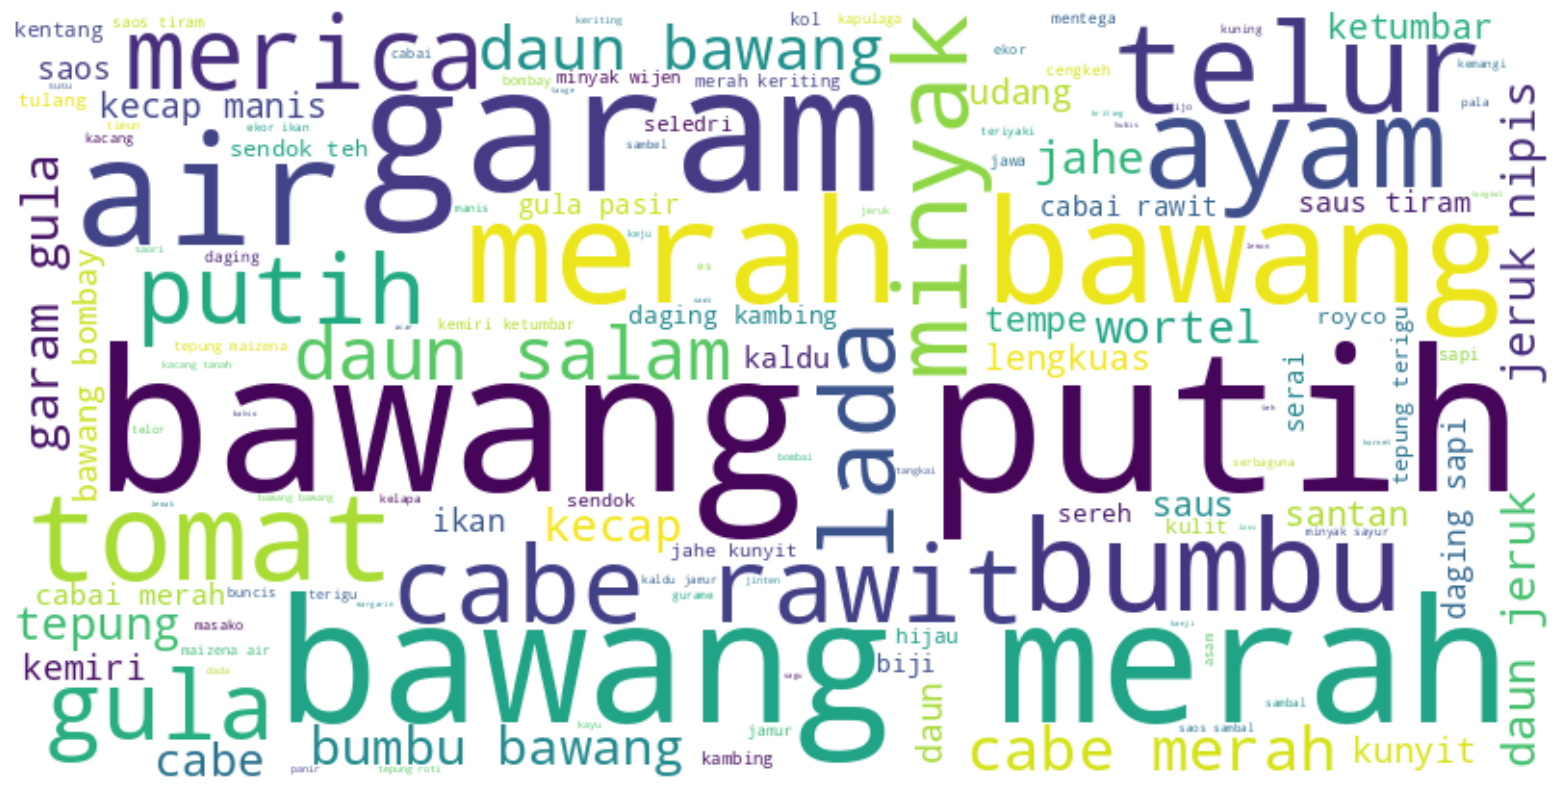

In [23]:
ingredients_text = ' '.join([ingredients for ingredients in cleaned_ingredients5])

# visualisasi wordclound
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

### Masukkan Data yang Sudah Bersih ke Data Frame

In [24]:
cleaned_ingredients6 = cleaned_ingredients5.apply(lambda x: x)
data['Ingredients'] = cleaned_ingredients6
data.head()

,Title,Ingredients,IMG URL
0,Ayam Woku Manado,ekor ayam jeruk nipis garam kunyit bawang mera...,https://img-global.cpcdn.com/recipes/4a0bb9e71...
1,Ayam goreng tulang lunak,ayam serai daun jeruk bawang putih ketumbar la...,https://img-global.cpcdn.com/recipes/d820435f5...
2,Ayam cabai kawin,ayam cabai hijau cabai merah rawit bawang puti...,https://img-global.cpcdn.com/recipes/94c448501...
3,Ayam Geprek,daging ayam gula garam tepung ayam serbaguna k...,https://img-global.cpcdn.com/recipes/be1dca0c3...
4,Minyak Ayam,kulit ayam lemak bawang putih jahe minyak ketu...,https://img-global.cpcdn.com/recipes/c32bfa0b4...


# Generate Dataset

## Generate Copy All Data

In [25]:
def split_text(text):
  if isinstance(text, list):  # Tambahkan pengecekan jika text sudah berupa list
        text = ' '.join(text)
  words = text.split()
  return words

In [26]:
new_data = data.copy(deep=True)
new_data['Label'] = new_data.index
new_data.head()

,Title,Ingredients,IMG URL,Label
0,Ayam Woku Manado,ekor ayam jeruk nipis garam kunyit bawang mera...,https://img-global.cpcdn.com/recipes/4a0bb9e71...,0
1,Ayam goreng tulang lunak,ayam serai daun jeruk bawang putih ketumbar la...,https://img-global.cpcdn.com/recipes/d820435f5...,1
2,Ayam cabai kawin,ayam cabai hijau cabai merah rawit bawang puti...,https://img-global.cpcdn.com/recipes/94c448501...,2
3,Ayam Geprek,daging ayam gula garam tepung ayam serbaguna k...,https://img-global.cpcdn.com/recipes/be1dca0c3...,3
4,Minyak Ayam,kulit ayam lemak bawang putih jahe minyak ketu...,https://img-global.cpcdn.com/recipes/c32bfa0b4...,4


In [27]:
new_data['Ingredients'] = data['Ingredients'].apply(split_text)
new_data.head()

,Title,Ingredients,IMG URL,Label
0,Ayam Woku Manado,"[ekor, ayam, jeruk, nipis, garam, kunyit, bawa...",https://img-global.cpcdn.com/recipes/4a0bb9e71...,0
1,Ayam goreng tulang lunak,"[ayam, serai, daun, jeruk, bawang, putih, ketu...",https://img-global.cpcdn.com/recipes/d820435f5...,1
2,Ayam cabai kawin,"[ayam, cabai, hijau, cabai, merah, rawit, bawa...",https://img-global.cpcdn.com/recipes/94c448501...,2
3,Ayam Geprek,"[daging, ayam, gula, garam, tepung, ayam, serb...",https://img-global.cpcdn.com/recipes/be1dca0c3...,3
4,Minyak Ayam,"[kulit, ayam, lemak, bawang, putih, jahe, miny...",https://img-global.cpcdn.com/recipes/c32bfa0b4...,4


## Generate Sample

In [28]:
duplicated_data = []
for index, row in new_data.iterrows():
  ingredients = row['Ingredients']
  ingredients_length = len(ingredients)
  for start in range(ingredients_length):
    for end in range(ingredients_length):
      selected_elements = ingredients[start:start+end+1]
      duplicated_data.append({'Title': row['Title'], 'Ingredients': ' '.join(selected_elements), 'Label': row['Label']})

In [29]:
new_data_duplicated = pd.DataFrame(duplicated_data)
new_data_duplicated.head()

,Title,Ingredients,Label
0,Ayam Woku Manado,ekor,0
1,Ayam Woku Manado,ekor ayam,0
2,Ayam Woku Manado,ekor ayam jeruk,0
3,Ayam Woku Manado,ekor ayam jeruk nipis,0
4,Ayam Woku Manado,ekor ayam jeruk nipis garam,0


In [30]:
new_data_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64655 entries, 0 to 64654
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        64655 non-null  object
 1   Ingredients  64655 non-null  object
 2   Label        64655 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


### Remove Duplicated Data

In [31]:
new_data_duplicated = new_data_duplicated.drop_duplicates()
new_data_duplicated.reset_index(drop=True, inplace=True)
new_data_duplicated.head()

,Title,Ingredients,Label
0,Ayam Woku Manado,ekor,0
1,Ayam Woku Manado,ekor ayam,0
2,Ayam Woku Manado,ekor ayam jeruk,0
3,Ayam Woku Manado,ekor ayam jeruk nipis,0
4,Ayam Woku Manado,ekor ayam jeruk nipis garam,0


In [32]:
new_data_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33135 entries, 0 to 33134
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        33135 non-null  object
 1   Ingredients  33135 non-null  object
 2   Label        33135 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 776.7+ KB


## Export To CSV

In [33]:
new_data_duplicated.to_csv('recipe_dataset.csv', sep=',', index=False, header=True, encoding='utf-8')

In [34]:
data = pd.read_csv('/content/recipe_dataset.csv')
data.head()

,Title,Ingredients,Label
0,Ayam Woku Manado,ekor,0
1,Ayam Woku Manado,ekor ayam,0
2,Ayam Woku Manado,ekor ayam jeruk,0
3,Ayam Woku Manado,ekor ayam jeruk nipis,0
4,Ayam Woku Manado,ekor ayam jeruk nipis garam,0
